**Studi Kasus 10: Masalah Tanggal yang "Palsu"**

- Skenario & Data:
- Anda punya data transaksi harian. Sekilas terlihat rapi, tapi ada masalah tersembunyi.

----

In [14]:
import pandas as pd

data = {
    'tanggal': ['01-01-2023', '02-01-2023', '05-01-2023', '10-01-2023'],
    'terjual': [100, 150, 200, 120]
}

df = pd.DataFrame(data)

print("--- Data Awal ---")
print(df)
print("\n--- Cek Tipe Data ---")
print(df.info())

--- Data Awal ---
      tanggal  terjual
0  01-01-2023      100
1  02-01-2023      150
2  05-01-2023      200
3  10-01-2023      120

--- Cek Tipe Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tanggal  4 non-null      object
 1   terjual  4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes
None


- tugas kita adalah mengubah kolom itu dari Teks ("Object") menjadi Waktu ("Datetime").
- Kita akan menggunakan fungsi sakti Pandas: `pd.to_datetime()`.

In [15]:
# df['tanggal'] = pd.to_datetime(df['tanggal'], format='%d-%m-%Y')

# Mengubah teks menjadi datetime (Waktu)
# dayfirst=True memberitahu Pandas bahwa angka pertama adalah Tanggal (bukan Bulan)
df['tanggal'] = pd.to_datetime(df['tanggal'], dayfirst=True) 

print("--- Cek Tipe Data Baru ---")
print(df.info())

print("\n--- Data ---")
print(df)

--- Cek Tipe Data Baru ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tanggal  4 non-null      datetime64[ns]
 1   terjual  4 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 196.0 bytes
None

--- Data ---
     tanggal  terjual
0 2023-01-01      100
1 2023-01-02      150
2 2023-01-05      200
3 2023-01-10      120


- Ekstrak Informasi
- Coba kita buat kolom baru untuk melihat Nama Bulan dan Nama Hari dari tanggal-tanggal tersebut.

- Tugas:
- Gunakan df['tanggal'].dt.month_name() untuk mendapatkan nama bulan.
- Gunakan df['tanggal'].dt.day_name() untuk mendapatkan nama hari.

In [16]:
# Mengambil Tahun (Angka)
df['tahun'] = df['tanggal'].dt.year

# Mengambil nama bulan
df['bulan'] = df['tanggal'].dt.month_name()

# Mengambil nama hari
df['hari'] = df['tanggal'].dt.day_name()

print("--- Data dengan Bulan & Hari ---")
print(df)

--- Data dengan Bulan & Hari ---
     tanggal  terjual  tahun    bulan      hari
0 2023-01-01      100   2023  January    Sunday
1 2023-01-02      150   2023  January    Monday
2 2023-01-05      200   2023  January  Thursday
3 2023-01-10      120   2023  January   Tuesday


--- Total Penjualan per Hari ---
       hari  terjual
0    Monday      150
1    Sunday      100
2  Thursday      200
3   Tuesday      120


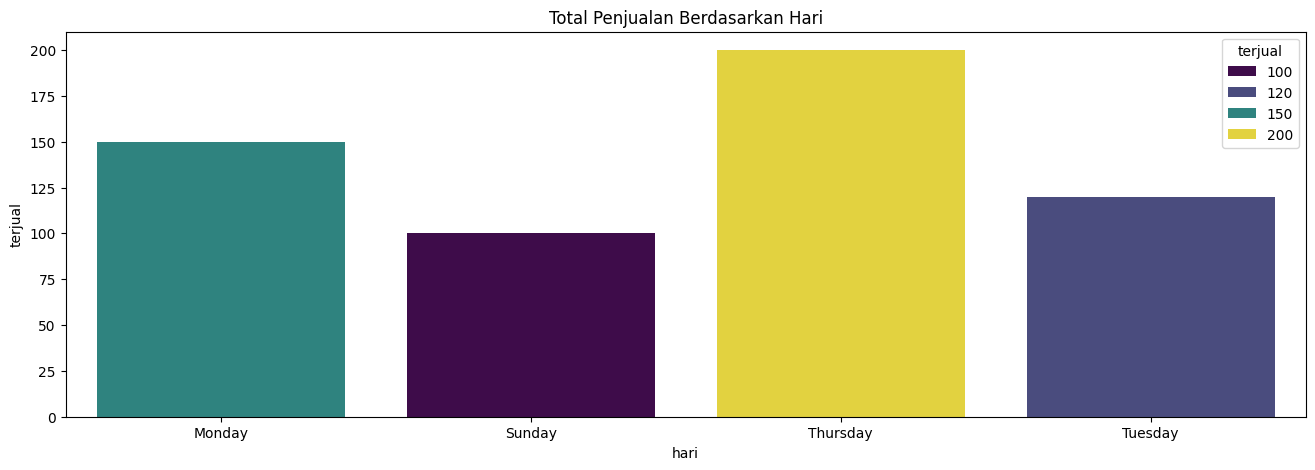

In [24]:
# Menghitung total penjualan per HARI
total_per_hari = df.groupby('hari', as_index=False)['terjual'].sum()

print("--- Total Penjualan per Hari ---")
print(total_per_hari)

# Bonus: Visualisasi Cepat
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 5))
# Kita urutkan biar rapi (opsional)
sns.barplot(data=total_per_hari, x='hari', y='terjual', hue='terjual', palette='viridis')
plt.title('Total Penjualan Berdasarkan Hari')
plt.show()